In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Consider aesthetics
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

---

## Table of Contents
* [Problem 1: Multivariate normal, MLE (formula proof)](#problem-1-multivariate-normal-mle-proof)
* [Problem 2: Binomial mean and variance formulas (formula proof)](#problem-2-binomial-mean-and-variance-formulas-proof)
* [Problem 3:  Bayesian Inference, univariate Gaussian with unknown mean](#problem-3-bayesian-inference-univariate-gaussian-with-unknown-mean)
    * [Problem 3.1:  Mean and variance of the Gaussian posterior (formula proof)](#problem-31-mean-and-variance-of-the-posterior-proof)
    * [Problem 3.2: Bayesian Inference of the unknown posterior mean (code)](#problem-32-bayesian-inference-of-the-unknown-posterior-mean-code)
* [Problem 4: Polynomial-regression (code)](#problem-4-polynomial-regression)

---

# **Problem 1: Multivariate normal, MLE proof** <a id="problem1"></a>
**Let $\{x_1,...,x_N\}$ be $Ν$ random vectors following a multidimensional Normal distribution. Assuming that the covariance matrix is known, derive analytically the Maximum Likelihood Estimate $\mu_{ML}$ for the distribution's mean.**  

## *Solution*
We have $N$ random vectors $X = \{\vec{x_1},...,\vec{x_n}\}$ following a Normal multidimensional distribution $N(\vec{\mu},\Sigma)$, where the covariance matrix $\Sigma$ is known and we want to get the best point estimate for the parameter vector for the mean (since we are talking about a multidimensional normal) of the distribution $\vec{\mu}$ given the sample $X$, without utilizing any prior information. Following Bayes's rule: $$p(\vec{\mu}|X) = \frac{p(X|\vec{\mu})p(\vec{\mu})}{p(X)} \ \ (1)$$ 
where: 
- $p(\vec{\mu}|X)$ is the posterior pdf of $\vec{\mu}$ given the sample vectors $X$ 
-  $p(X|\vec{\mu})$ is the likelihood, which corresponds to the normal pdf that is most likely to have generated the sample data $X$ given the mean $\vec{\mu}$.
- $p(\vec{\mu})$ is our prior belief in the form of the pdf of the mean $\vec{\mu}$
$P(X) = \int P(X|\mu)P(\mu)$ is a marginal probability not dependent on $\vec{\mu}$ that scales the posterior so that $\int p(\vec{\mu}|X) = 1$ and does not affect its shape. Since we are interested in finding the pdf's maximum optima with respect to $\mu$, the point estimate where the partial derivative is 0, we are only concerned with the shape of the pdf. Thus the posterior is proportional to the likelihood multiplied with the prior:
$$(1) \implies  p(\vec{\mu}|X) \propto p(X|\vec{\mu})p(\vec{\mu}) $$
Since we are interested in a point estimate of the mean $\vec{\mu}$ without taking into account any prior beliefs, we can try to approximately maximize the posterior by maximizing only the likelihood in equation $(1)$ with respect to $\mu$. 
\\
\\
Thus we need to find $\vec{\mu_{ML}} = argmax_\mu p(X|\vec{\mu})$: $$p(X|\vec{\mu}) =\prod_{i=1}^Np(\vec{x_i}|\vec{\mu})$$ Additionally since maximizing a function is the same as maximizing the logarithm of said function (because the logarithm is a monotonic function):
 $$\ln p(X|\vec{\mu}) = \ln(\prod_{i=1}^Np(\vec{x_i}|\vec{\mu})) = \sum_{i=1}^N\ln p(\vec{x_i}|\vec{\mu})  = \sum_{i=1}^N \ln (\frac{1}{(2\pi)^{\frac{D}{2}}|\Sigma|^{\frac{1}{2}}} exp(-\frac{1}{2} (\vec{x}_i-\vec{\mu})^T \Sigma^{-1}(\vec{x}_i-\vec{\mu})))$$
 Since we are interested in maximizing $\mu$, the term before the exponential can be written as a constant $C$, since it does not contain the $\mu$ parameter, thus:
$$\implies \sum_{i=1}^N( \ln C -\frac{1}{2}(\vec{x}_i-\vec{\mu})^T \Sigma^{-1}(\vec{x}_i-\vec{\mu})) = N\ln C -\frac{1}{2} \sum_{i=1}^N((\vec{x}_i-\vec{\mu})^T \Sigma^{-1}(\vec{x}_i-\vec{\mu}))$$
Taking the partial derivative with respect to $\mu$ and using the differentiation rule: $\frac{d(\vec{\theta}^TA\vec{\theta})}{d(\vec{\theta})}=2A\vec{\theta}$
$$\implies \frac{\partial{\ln p(X|\vec{\mu})}}{\partial{\vec{\mu}}} = 0 - \frac{2}{2}\Sigma^{-1}\sum_{i=1}^N(x_i - \vec{\mu}) = -\Sigma^{-1}\sum_{i=1}^N x_i + \Sigma^{-1}N\vec{\mu}$$
setting the derivative to zero to find the maxima of $\vec{\mu}$ we get:
$$\implies \Sigma^{-1}N\vec{\mu} = \Sigma^{-1}\sum_{i=1}^N x_i \implies \vec{\mu}_{ML} = \frac{1}{N}\sum_{i=1}^N x_i $$

---

# **Problem 2:  Binomial mean and variance formulas proof**

## *Solution* <a class="anchor" id="Solution2"></a>
The binomial distribution probability mass function is given by: $$Bin(m|N,\mu) =  {N \choose m}\mu^m(1-\mu)^{N-m}= \frac{N!}{(N-m)!m!}\mu^m(1-\mu)^{N-m}$$ It's a way to model the probability that $m$ successes will occur in $N$ independent Bernoulli success-failure trials, where the probability of success is $\mu$ and its the same across all trials. 
For a single Bernoulli trial, its probability mass function is $Bern(x|\mu) = \mu^x(1-\mu)^{1-x}$, thus:
$$E[x] = \sum_{x\in\{0,1\}}x Bern(x|\mu) =  \sum_{x\in\{0,1\}}x \mu^x(1-\mu)^{1-x} = 0 + \mu = \mu$$
$$V[x] = E[x^2]-E[x]^2 = \sum_{x\in\{0,1\}}x^2 \mu^x(1-\mu)^{1-x} - (\sum_{x\in\{0,1\}}x \mu^x(1-\mu)^{1-x})^2 = \mu - \mu^2 = {\mu(1-\mu)}$$ 
Thus for $N$ subsequent independent Bernoulli trials of which the Binomial consists of:

$$E[m] = \sum^N_{i=1}E[x_i] = \sum^N_{i=1}\sum_{x_i\in\{0,1\}}x_i\mu^x_i(1-\mu)^{1-x_i} = N\mu$$
$$V[m] =  \sum^N_{i=1}V[x_i] = \sum^N_{i=1}(\sum_{x\in\{0,1\}}x_i^2 \mu^{x_i}(1-\mu)^{1-x_i} - (\sum_{x\in\{0,1\}}x_i \mu^x_i(1-\mu)^{1-x_i})^2) = N\mu(1-\mu)$$

---

# **Problem 3: Bayesian Inference, univariate Gaussian with unknown mean**

## **Problem 3.1: Mean and variance of the posterior proof**
**Prove the the formulas for the mean and variance of the posterior are: $\mu_N =\frac{N\sigma_0^2\bar{x}+ \sigma^2\mu_0}{N\sigma_0^2 + \sigma^2}$, $\sigma^2_N = \frac{\sigma^2\sigma^2_0}{N\sigma^2_0 + \sigma^2}$**

### *Solution*

## **Problem 3.2: Bayesian Inference of the unknown posterior mean (code)**
**Consider now that $x$ follows the distribution $x\simΝ(μ,16)$, and as Bayesians, we assume a prior for the mean $\mu \sim Ν(0,4)$. Use the distribution $Ν(7,16)$ to generate $N$ observations for $x$**
- a) Develop an algorithm that estimates the mean and variance of the posterior distribution
, assuming we have available a dataset of $N = 1, 5, 10, 20, 50, 100, 1000$ observations, respectively. What do you observe as the number of observations $N$ is increasing?

- b) For every value of $N$, provide a diagram that shows the prior distribution, the distribution generating the data, and the estimated posterior distribution. Clearly label the axes of your diagrams.

### *Solution*
From 3.1 we have derived that the:
- The mean of the posterior distribution $p(\mu|X)$, is given by:
$$\mu_N =\frac{N\sigma_0^2\bar{x}+ \sigma^2\mu_0}{N\sigma_0^2 + \sigma^2} \ \ (1)$$
- The variance is given by:
$$\sigma^2_N = \frac{\sigma^2\sigma^2_0}{N\sigma^2_0 + \sigma^2} \ \ (2)$$

Our goal is to develop a method that estimates the mean and variance of the posterior, given a dataset of observations and then plots a diagram of:
- The prior distribution 
- The generating distribution 
- The estimated posterior distribution

All distributions refer to univariate normals of form: $$p(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

To achieve this we create a class: `Univariate_Bayesian_Inference` to house all the methods needed for the tasks above.
1. Since the prior distribution, as well as the generating distribution are known we pass their parameters as arguments in the class constructor 
2. First  `generating_distribution_sampling` allows us to generate a dataset $X$ of a defined number of observations via the normal function provided by the numpy library:  `np.random.normal(mean,stdv,size)`, since we know the variance, we pass its square root `var**(1/2)` as the standard deviation. The `size` of the sample is defined when the method is called by the argument `draws`
3. Then, passing the generated dataset $X$ to the `MAP_estimation` method utilizes equations we have derived: (1), (2) to estimate the mean and variance of the posterior distribution.
  
If we wish to plot the pdf's of the prior, generating and the estimated posterior distribution we can:
1. Get the 100 evenly seperated points from each distibution utilizing methods: `generative_distribution_points`, `prior_distribution_points` , `posterior_distribution_points`, which use the known parameters (passed as arguments in the class constructor), of the generating and prior distribution as well as the estimated mean from the `MAP_estimation` to pick observations in the range of the distribution in the x-axis and find their target on y-axis. 
2. We use these points to generate each of the pdfs on the same figure utilizing the `plot_pdfs` method 

In [14]:
class Univariate_Bayesian_Inference():
    def __init__(self,prior_mean,prior_var,generating_mean,generating_var):
        self.prior_mean = prior_mean
        self.prior_var = prior_var
        self.generating_mean = generating_mean
        self.generating_var = generating_var

    #Since we dont want to caputre specifically evenly separated points as the points in self.generative_x below , we utilizie the numpy random.normal function
    def generating_distribution_sampling(self,draws):
        generated_samples = np.random.normal(self.generating_mean,(self.generating_var)**(1/2),size = draws)
        return generated_samples
    
    # We get points to plot the pdf, using evenly seperated points for the x axis that fit the range of the distribution and their corresponding density based on the Gaussian function
    def generative_distribution_points(self):
        generative_sigma = (self.generating_var)**(1/2)
        self.generative_x = np.linspace(self.generating_mean- 3*generative_sigma, self.generating_mean + 3*generative_sigma, 100)
        self.generative_y = 1/(np.sqrt(2*np.pi)*generative_sigma)*np.exp(-(self.generative_x  - self.generating_mean)**2/(2*generative_sigma**2))
        return self.generative_x, self.generative_y
    
    # As above 
    def prior_distribution_points(self):
        prior_sigma = (self.prior_var)**(1/2)
        self.prior_x = np.linspace(self.prior_mean- 3*prior_sigma, self.prior_mean + 3*prior_sigma, 100)
        self.prior_y = 1/(np.sqrt(2*np.pi)*prior_sigma)*np.exp(-(self.prior_x  - self.prior_mean)**2/(2*prior_sigma**2))
        return self.prior_x, self.prior_y
    
    # As above 
    def posterior_distribution_points(self):
        try:
            posterior_sigma = (self.posterior_var)**(1/2)
            self.posterior_x = np.linspace(self.posterior_mean- 3*posterior_sigma, self.posterior_mean + 3*posterior_sigma, 100)
            self.posterior_y = 1/(np.sqrt(2*np.pi)*posterior_sigma)*np.exp(-(self.posterior_x - self.posterior_mean)**2/(2*posterior_sigma**2))
        except NameError:
            print("You cant sample from the posterior without first estimating its paremeters, use the MAP_estimator method first")
        return self.posterior_x, self.posterior_y
    
    def MAP_estimation(self,generated_samples):
        # Posterior mean estimation using equation (1)
        N = generated_samples.shape[0]
        x_bar = np.mean(generated_samples)
        self.posterior_mean = (N*self.prior_var*x_bar + self.generating_var*self.prior_mean)/(N*self.prior_var + self.generating_var)
        # Posterior variance estimation using equation (2)
        self.posterior_var = (self.generating_var* self.prior_var)/(N*self.prior_var + self.generating_var)
        return self.posterior_mean,self.posterior_var

    def plot_pdfs(self,generated_samples):
        plt.figure(figsize = (9,6))
        plt.title(f"Maximum a posterior estimation of posterior probability of the mean given N={generated_samples.shape[0]} data-points", fontsize = 14)
        # We plot the distributions based on the points we have calculated 
        plt.plot(self.generative_x, self.generative_y,  color = "tab:blue", label = "Generating Distribution",linewidth=3 )
        plt.plot(self.prior_x,self.prior_y,  color = "tab:green", label = "Prior Distribution of the mean",linewidth=3 )
        plt.plot(self.posterior_x, self.posterior_y, color = "tab:orange", label = "Posterior Distribution of the estimated mean",linewidth=3)
        #Vertical lines to the denote the means of each distribution
        plt.vlines(7,0,4, linestyles='dashed', label = "True mean", color = "tab:blue",linewidth=1.5, alpha = 0.8)
        plt.vlines(0,0,4, linestyles='dashed', label = "Prior mean", color = "tab:green",linewidth=1.5, alpha = 0.8)
        plt.vlines(self.posterior_mean,0,4, linestyles='dashed', color = "tab:orange", label = "Estimated mean",linewidth=1.5, alpha = 0.8)
        # Misc settings
        plt.legend(fontsize = 11)
        # Somehow the y-axis drifts away from 0, so we limit it to 0,4 the same as the ticks
        plt.ylim(0,4)
        plt.ylabel("Density", fontsize = 14)
        plt.xlabel("x",fontsize = 14)
        plt.xticks(np.arange(-8,22,2))
        plt.yticks(np.arange(0,4.0,0.5))
        plt.grid()
        plt.show()

Having created the `Univariate_Bayesian_Inference` we can estimate the mean and variance of the posterior using the Maximum a Posteriory(MAP) method for sample datasets $X$ of size $N = [N= 1, 5, 10, 20, 50, 100, 1000]$, where $X\sim N(7,16)$ with a prior belief for the mean $\mu \sim N(0,4)$. We begin by initializing an instance of the `Univariate_Bayesian_Inference` class called `experiment` and pass in the relevant known parameters of the prior and generating distributions

In [15]:
experiment = Univariate_Bayesian_Inference(prior_mean=0,prior_var=4,generating_mean=7,generating_var=16)

Now we solve the problem a) b) step by step:
1. We sample $N$ points from the generating distribution
3. We utilize the MAP method to estimate the mean $equation \ (1)$ and variance $equation \ (2)$ of the posterior for the $N$ points sampled from the generating distribution
4. We use the estimated mean and variance of the posterior as well as the known generating, prior mean and variance to retrieve 100 observation-target pairs for each distribution 
5. We plot the distributions per sample size $N$

----- For 1 sample(s), posterior mean = 1.8, posterior variance = 3.2 ----


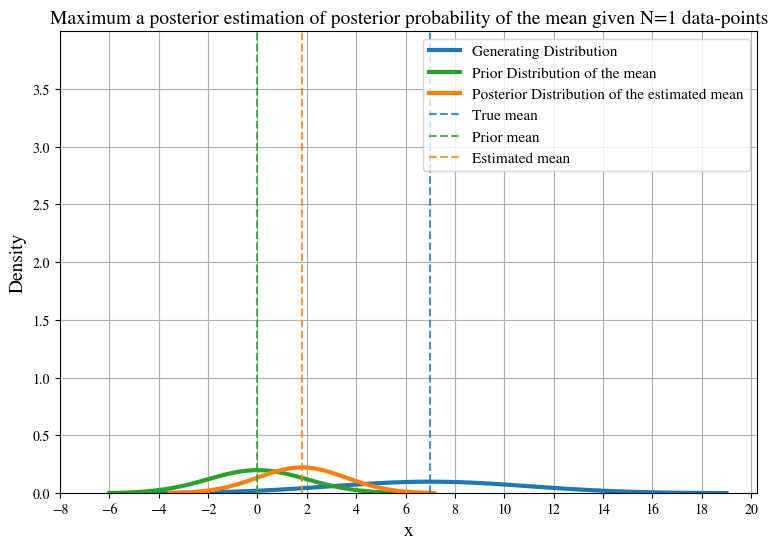

----- For 5 sample(s), posterior mean = 4.58, posterior variance = 1.78 ----


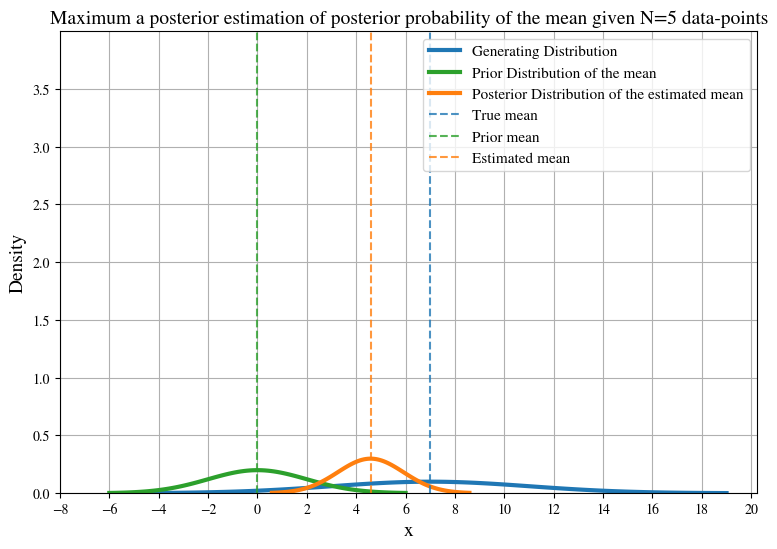

----- For 10 sample(s), posterior mean = 4.29, posterior variance = 1.14 ----


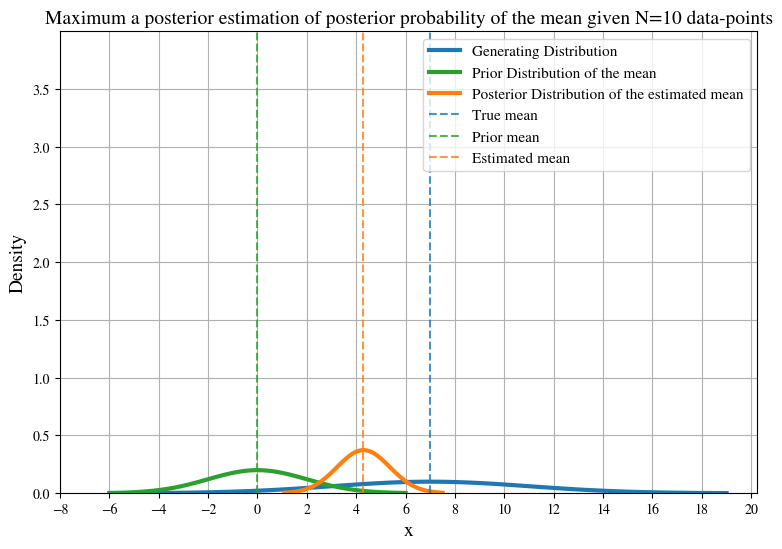

----- For 20 sample(s), posterior mean = 4.92, posterior variance = 0.67 ----


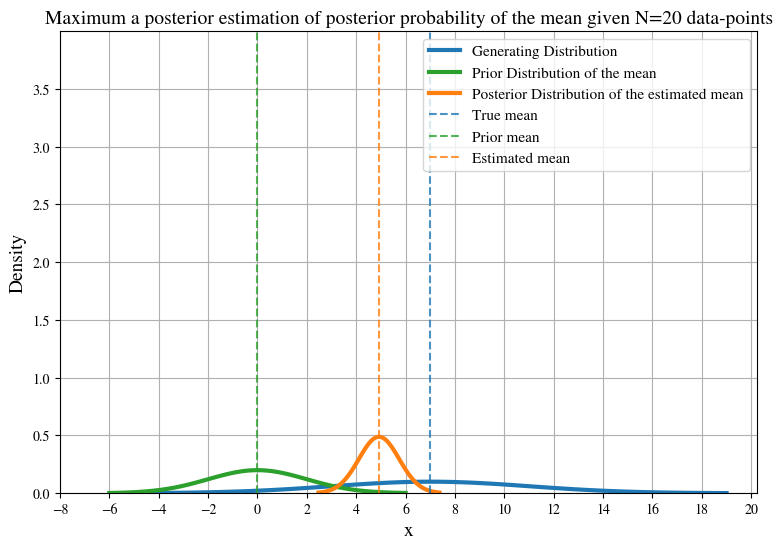

----- For 50 sample(s), posterior mean = 6.17, posterior variance = 0.3 ----


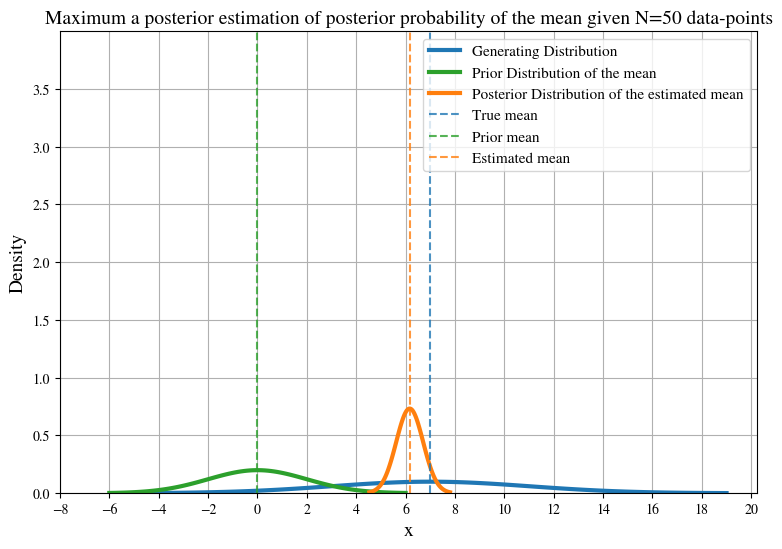

----- For 100 sample(s), posterior mean = 6.95, posterior variance = 0.15 ----


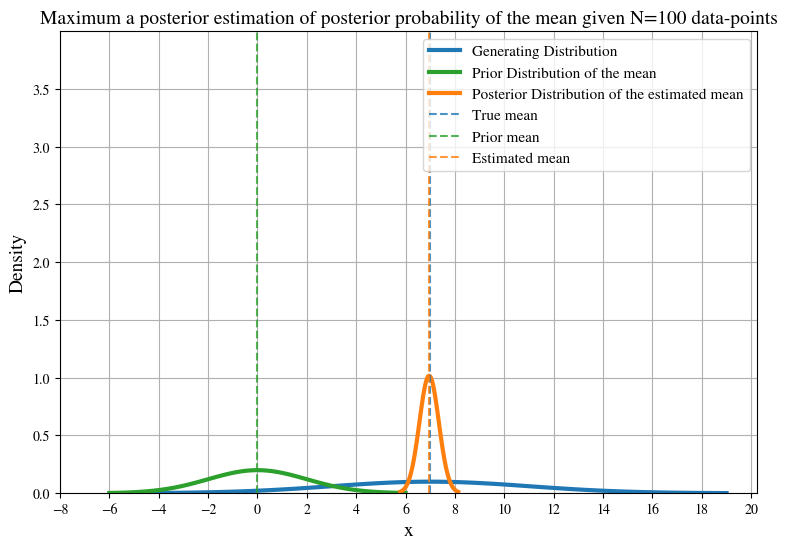

----- For 1000 sample(s), posterior mean = 7.18, posterior variance = 0.02 ----


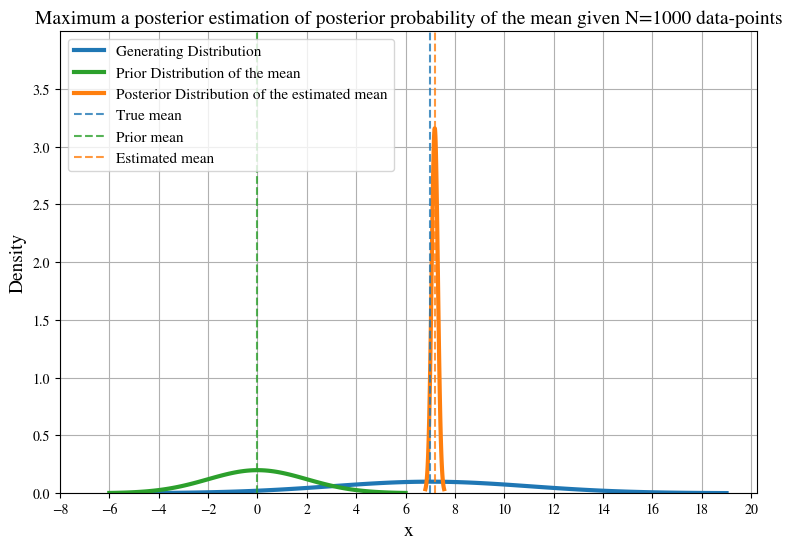

In [16]:
#seed for reproducability
np.random.seed(42)
for i in [1,5,10,20,50,100,1000]:
    #Get sample points 
    generated_samples = experiment.generating_distribution_sampling(i)
    mean, var = experiment.MAP_estimation(generated_samples)
    print(f"----- For {i} sample(s), posterior mean = {round(mean,2)}, posterior variance = {round(var,2)} ----")
    #Get the points to plot the distributions
    experiment.generative_distribution_points()
    experiment.posterior_distribution_points()
    experiment.prior_distribution_points()
    experiment.plot_pdfs(generated_samples)

### **Results**

As we can see, as the number of samples increases, our estimate for the mean approaches the true value of $\mu=7$ and our uncertainty of each estimation quantified by $\sigma_N^2$ is decreasing.

Looking at equation (2) $\sigma^2_N = \frac{\sigma^2\sigma^2_0}{N\sigma^2_0 + \sigma^2} \ \ (2)$ and considering our prior beliefs $N \sim (0,4)$ compared to the true generating distribution $X \sim (7,16)$ the reason behind this observation is clear:   
1. We bagin by a false belief, not close the true distribution thus
2. 
3. 

We can visualize this by also $N$, 

---

# **Problem 4: Polynomial Regression**
Draw a period of the sinusoidal function $y(x)=sin(2πx)$ and select $N$ samples for $x$ uniformly distributed in the interval $[0,1]$. To every $y(x)$ add Gaussian noise distributed as $Ν(0,1)$ to generate a data set of noisy observations.
Fit to the noisy observations a polynomial model of degree $M=2,3,4,5,9$ and provide a table with the coefficients of the best least-squares fit model and the achieved RMSE. Also, provide a plot showing the function $y(x)$, the observations drawn, and the best fit model for every value of M.
Repeat the above procedure for two values of $N=10$ and $N=100$. What do you observe? Discuss your findings.

## **Solution**
The true model is of the form  $y(x)=sin(2πx)$ and the generating model is $t = sin(2\pi x) + \eta$, where $\eta \sim Ν(0,1)$. 

We wish to perform regression and estimate the polynomial model that best fits the true model using the Least Squares method and evaluating the root mean squared error (RMSE)
Below we build a class called `Least_squares_regression` with methods that will carry out these tasks.
1. `generate_model_points` generates the targets $y$ for an $X$ sample of size $N$, evenly distributed between $[0,1]$. We manage that by using `np.linspace(0,1,N)` to draw $N$ evenly seperated samples in the described range and then using the generating model $y(x)$ to generate the targets for the sample observations. Additionally with the same logic we draw 100 points to plot the true shape of the curve using the true model $y(x)$ without noise.
2. We are itrested in creating various polynomial models to fit and evaluate, for this reason we code the method `polynomial_model_constructor` which creates a matrix of form $$\Phi = \begin{bmatrix}  1 & x_1 & x_1^2 & x_1^3   &  \dots  \\ 1 & x_2 & x_2^2 & x_2^3  & \dots  \\ \vdots & \vdots & \vdots & \vdots  & \vdots \\ 1 & x_n & x_n^2 & x_n^3 & \dots  \end{bmatrix}$$ that has as many rows as  our $X$ sample sizes and as many columns as the polynomial degree of choice + 1 for the bias term. This allows us to write all possible polynomials of choice in the form $Y = \vec{w}\Phi $  where the weight vector $\vec{w}$, is a column vector of rows = columns of $\Phi$ 
3. In order to `fit` the constructed polynomial model we utilize the the least squares error estimation method for generalized linear regression(since the model is linear on the parametes in the $\vec{w}$) $$\vec{w_{LS}}=(\Phi^T \Phi)^{-1}\Phi^T\vec{y}$$
4. Having fitted the model we can `predict` via our model structure with the trained weight vector $\vec{y_{pred}} = \Phi\vec{w_{LS}}$
5. Finally we can `evaluate` the performance of our fitted model by finding the root mean squared error (RMSE) of our predictions  $\vec{y_{pred}}$  vs the true values  $\vec{y_{true}}$:  $$(RMSE) = \sqrt{\frac{1}{N} \sum_{i=1}^{N} ({y_{i_{pred}}}-{y_{i_{true}}})^2}$$

In [3]:
class Least_squares_regression():

    def generate_model_points(self,N):
        # 100 points to graph a period of the true model
        x_generating = np.linspace(0,1,100)
        y_generating = np.sin(2*np.pi*x_generating)
        #generating model with sample of size N predictions + noise 
        X_train = np.linspace(0,1,N)
        y_train = np.sin(2*np.pi*X_train) + np.random.normal(0,1,N)
        return X_train, y_train, x_generating, y_generating
    
    def polynomial_model_constructor(self,X,degree):
        Phi =[]
        for i in range(X.shape[0]):
            #Create the structure of the model, based on the polynomial degree using a list comprehension
            Phi.append([1] + [X[i]**j for j in range(1,degree+1)])
        return np.array(Phi)

    def fit(self,Phi,y_train):
        self.w = np.dot((np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)), y_train)
        return self.w
            
    def predict(self,Phi):
        return np.dot(Phi, self.w)

    def evaluate(self,y_pred,y_train):
        return np.sum((((y_pred - y_train)**2)/y_train.shape[0])**(1/2))

In [4]:
model_1 = Least_squares_regression()

We begin by generating a training set of $50$ observations and plotting them along with the curve of the true model:

In [5]:
def fit_and_evaluate_polynomials(X_train,y_train,regression_model):
  #Build the Phi matrix per polynomial degree
  per_polynomial_Phi = []
  for degree in [2,3,4,5,9]:
      Phi = regression_model.polynomial_model_constructor(X_train,degree)
      per_polynomial_Phi.append(Phi)

  #Collect as we iterate per polynomial relevant information
  per_polynomial_w = [] 
  per_polynomial_predictions = []
  per_polynomial_RMSE = []
  for Phi in per_polynomial_Phi:
    # Fit
    w = model_1.fit(Phi,y_train)
    per_polynomial_w.append([round(coef,4) for coef in w])
    #Predict
    y_pred = regression_model.predict(Phi)
    per_polynomial_predictions.append(y_pred)
    # Evaluate
    RMSE = regression_model.evaluate(y_pred,y_train)
    per_polynomial_RMSE.append(RMSE)
  return per_polynomial_w, per_polynomial_predictions, per_polynomial_RMSE

#Plots all the fitted polynomial models created with fit_and_evaluate_polynomials, as well as the true model
def plot_fitted_models(X_train,y_train,per_polynomial_predictions,x,y):    
    plt.figure(figsize=(10,10))
    plt.title(f"Least squares fitted polynomial models of varying degrees vs the true model curve for a sample dataset of N = {X_train.shape[0]}",fontsize = 14)
    plt.scatter(X_train,y_train,label = "Training set",color = "tab:pink",alpha=0.8)
    for predictions,degree in zip(per_polynomial_predictions,[2,3,4,5,9]):
        plt.plot(X_train,predictions,label =f"Polynomial Model of degree: {degree}",linewidth=2)
    plt.plot(x,y,label="True Model sin(2πx)", color = "Black",linewidth=2,linestyle='-.')
    plt.ylabel("Targets",fontsize = 15)
    plt.xlabel('Observations',fontsize = 15)
    plt.xlim(0,1)
    plt.legend()
    plt.grid()
    plt.show()

### **For N=60 sample observations**

In [34]:
np.random.seed(42)
X_train,y_train,x,y = model_1.generate_model_points(50)
per_polynomial_w, per_polynomial_predictions, per_polynomial_RMSE = fit_and_evaluate_polynomials(X_train,y_train,model_1)
data = {"Polynomial Model degree":[2,3,4,5,9],"Coefficients":per_polynomial_w,"RMSE":per_polynomial_RMSE}
df = pd.DataFrame(data)
#Utilized to print the df to markdown, which is then placed in a markdown cell shown below 
print(df.to_markdown()) 

|    |   Polynomial Model degree | Coefficients                                                                                                           |    RMSE |
|---:|--------------------------:|:-----------------------------------------------------------------------------------------------------------------------|--------:|
|  0 |                         2 | [1.312, -4.5172, 2.1416]                                                                                               | 5.10505 |
|  1 |                         3 | [0.6707, 3.59, -18.3325, 13.6494]                                                                                      | 4.97639 |
|  2 |                         4 | [0.6434, 4.1916, -21.104, 17.9891, -2.1699]                                                                            | 4.96686 |
|  3 |                         5 | [0.5343, 8.0014, -48.8533, 93.0714, -87.044, 33.9497]                                                                  | 4.95825 |
|  4 |                         9 | [0.444, -19.0697, 911.9311, -10498.867, 55331.7644, -160245.8439, 271469.8698, -268483.8108, 143706.6552, -32174.4038] | 4.82873 |

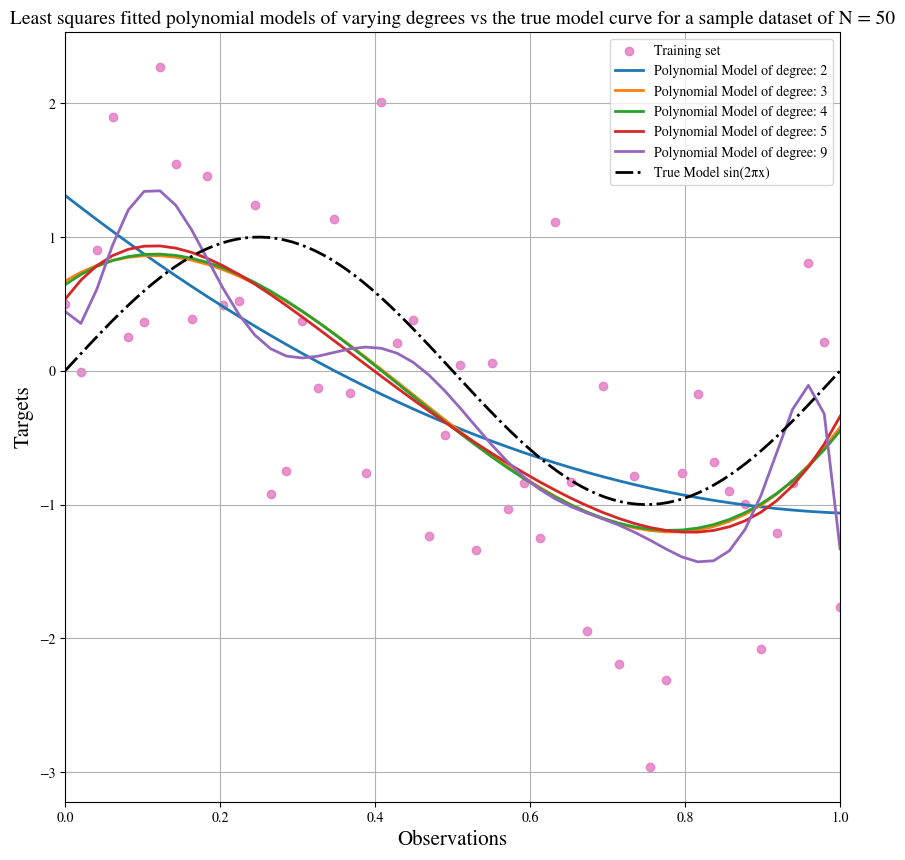

In [35]:
plot_fitted_models(X_train,y_train,per_polynomial_predictions,x,y)

### **For N=10 sample observations**

In [38]:
X_train,y_train,x,y = model_1.generate_model_points(10)
per_polynomial_w, per_polynomial_predictions, per_polynomial_RMSE = fit_and_evaluate_polynomials(X_train,y_train,model_1)
data = {"Polynomial Model degree":[2,3,4,5,9],"coefficients":per_polynomial_w,"RMSE":per_polynomial_RMSE}
df = pd.DataFrame(data)
#Utilized to print the df to markdown, which is then placed in a markdown cell shown below 
print(df.to_markdown()) 

|    |   Polynomial Model degree | coefficients                                                                                                                 |      RMSE |
|---:|--------------------------:|:-----------------------------------------------------------------------------------------------------------------------------|----------:|
|  0 |                         2 | [0.7171, -1.3612, 0.4632]                                                                                                    | 2.51356   |
|  1 |                         3 | [-0.2594, 14.7152, -41.9075, 28.2471]                                                                                        | 1.89829   |
|  2 |                         4 | [0.2188, -3.2171, 48.6509, -117.0049, 72.626]                                                                                | 1.21706   |
|  3 |                         5 | [0.4453, -23.847, 220.6135, -603.086, 629.785, -222.8636]                                                                    | 0.910405  |
|  4 |                         9 | [0.324, 238.6889, -5507.1265, 49350.3911, -231190.6244, 632325.4462, -1045860.6682, 1028480.6043, -552484.0821, 124648.0235] | 0.0007023 |

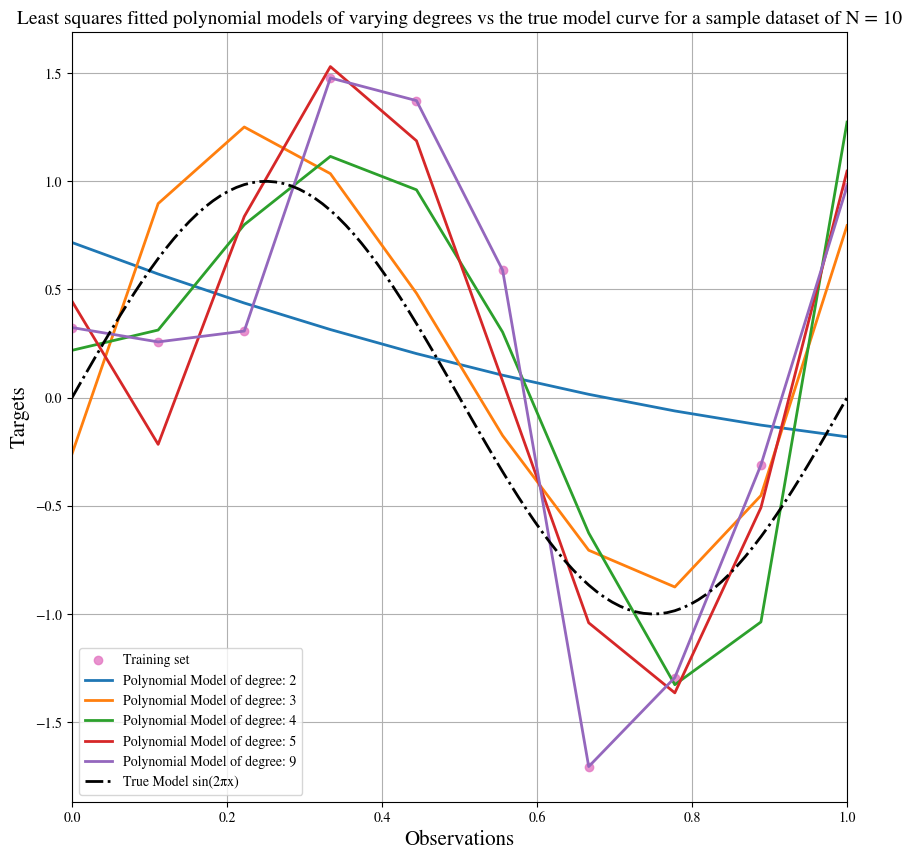

In [37]:
plot_fitted_models(X_train,y_train,per_polynomial_predictions,x,y)

### **For N=100 sample observations**

In [42]:
X_train,y_train,x,y = model_1.generate_model_points(100)
per_polynomial_w, per_polynomial_predictions, per_polynomial_RMSE = fit_and_evaluate_polynomials(X_train,y_train,model_1)
data = {"Polynomial Model degree":[2,3,4,5,9],"coefficients":per_polynomial_w,"RMSE":per_polynomial_RMSE}
df = pd.DataFrame(data)
# to collect the markdown table and paste it in a markdown cell
print(df.to_markdown()) 

|    |   Polynomial Model degree | coefficients                                                                                                       |    RMSE |
|---:|--------------------------:|:-------------------------------------------------------------------------------------------------------------------|--------:|
|  0 |                         2 | [1.0208, -1.535, -0.5271]                                                                                          | 7.73806 |
|  1 |                         3 | [-0.2861, 14.5532, -40.9504, 26.9489]                                                                              | 6.34884 |
|  2 |                         4 | [-0.0531, 9.6729, -18.7306, -7.73, 17.3395]                                                                        | 6.36587 |
|  3 |                         5 | [0.4925, -7.9299, 106.9717, -345.4233, 398.1769, -152.335]                                                         | 6.12001 |
|  4 |                         9 | [0.5861, -29.9141, 688.1066, -5959.3, 27318.9601, -73009.3786, 116985.5498, -110775.6813, 57243.3217, -12462.8772] | 6.01386 |

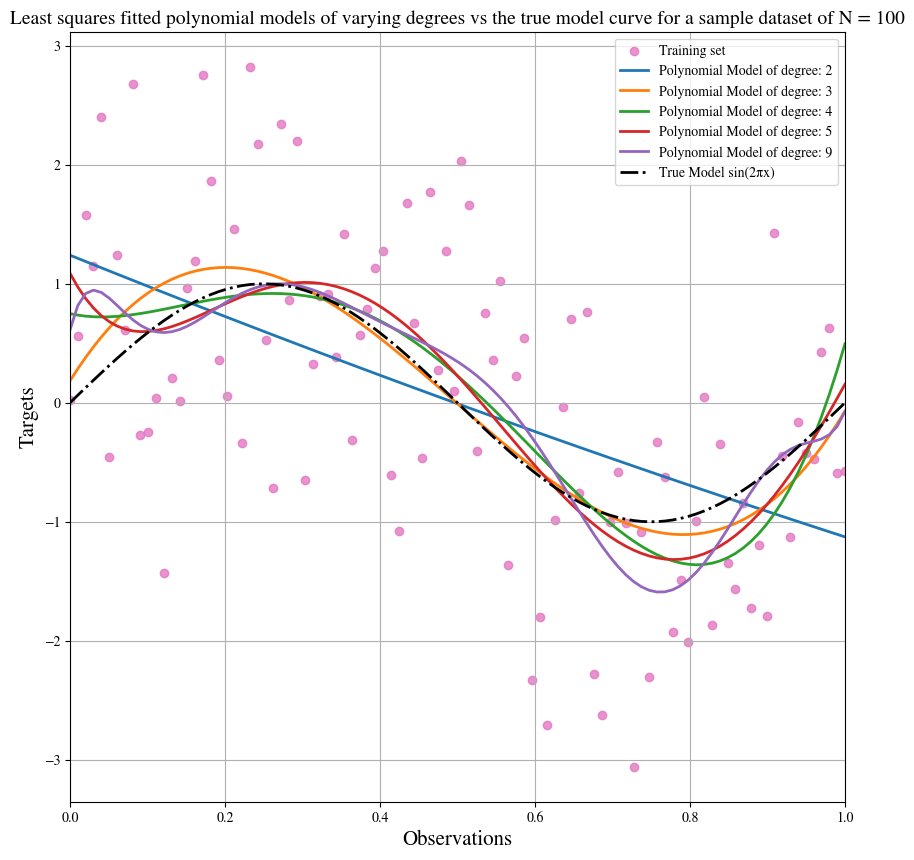

In [43]:
plot_fitted_models(X_train,y_train,per_polynomial_predictions,x,y)

---

# **Problem 5**